# Backtesting
---

In [3]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import numpy as np
import pandas as pd

import FinanceDataReader as fdr

In [4]:
df = fdr.DataReader('066570','2018')
df[df['Change'] > 0.1]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-08-10,77100,86200,76500,85700,3706582,0.110104
2020-12-23,92700,119500,91100,119500,16565841,0.296095
2020-12-28,114500,136500,113000,124500,21982050,0.111607
2021-01-20,148500,167000,146500,167000,10340439,0.128378
2021-01-21,168500,192500,163500,185000,16304954,0.107784
2021-09-03,142000,154500,140500,153500,4043334,0.100358


<AxesSubplot: xlabel='Date'>

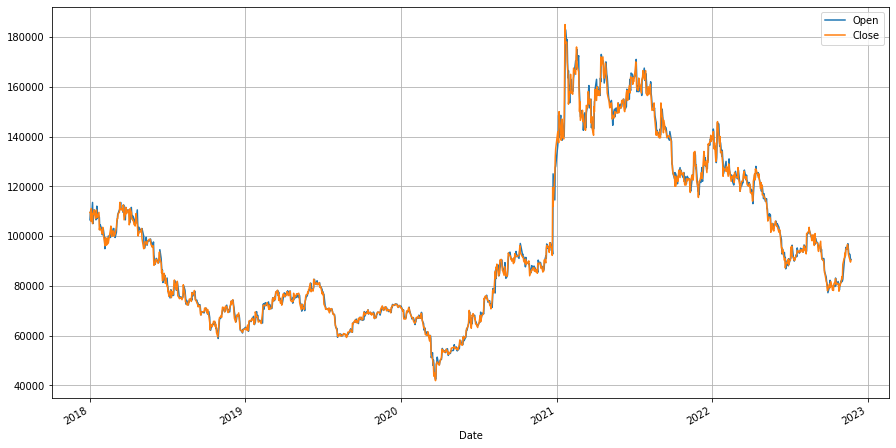

In [7]:
df = fdr.DataReader('066570','2018')

df.plot(y = ['Open', 'Close'], figsize = [15,8], grid = True)

<AxesSubplot: xlabel='Date'>

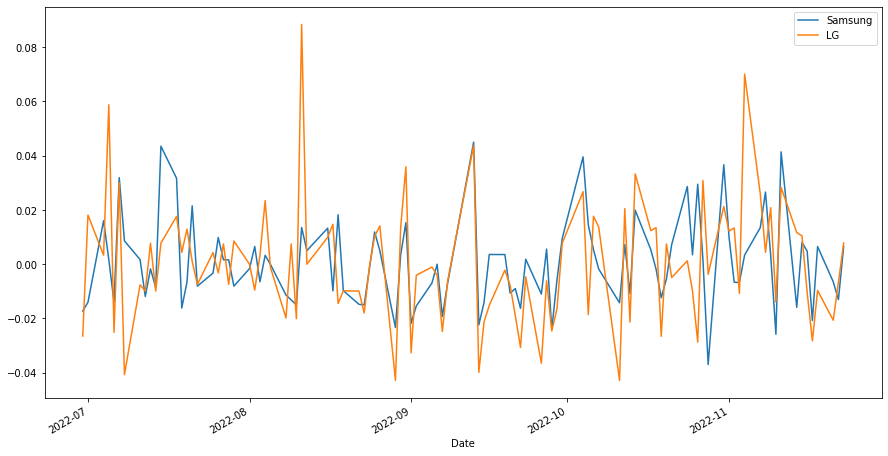

In [6]:
df_1 = fdr.DataReader('005930','2018')
df_2 = fdr.DataReader('066570','2018')

df = pd.DataFrame()
df['Samsung'] = df_1['Change']
df['LG'] = df_2['Change']

df.tail(100).plot(figsize = [15, 8])

In [8]:
def get_return_sl(code, short, long):
    
    df = fdr.DataReader(code,'2018')

    df = df[['Close']].copy()

    df['ma1'] = df['Close'].rolling(short).mean().shift(1)
    df['ma2'] = df['Close'].rolling(long).mean().shift(1)

    df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

    df.iloc[-1, -1] = 'sell'

    cond1 = ( df['action'] == 'buy') & ( df['action'].shift(1) == 'sell')
    cond2 = ( df['action'] == 'sell') & ( df['action'].shift(1) == 'buy')

    df_buy = df[cond1].reset_index()
    df_buy.columns = ['날짜', '종가(buy)', '이평3일', '이평30일', '결정']

    df_sell = df[cond2].reset_index()
    df_sell.columns = ['날짜', '종가(sell)', '이평3일', '이평30일', '결정']

    df_result = pd.concat([df_buy, df_sell], axis = 1)

    df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)'] 

    df_final = (df_result[['수익률']].cumprod().tail(1) -1)*100

    df_final['단기 이평'] = short
    df_final['장기 이평'] = long

    return df_final

In [11]:
get_return_sl('005930', 10, 58)

# get_return_sl('005930', 10, 34)

,수익률,단기 이평,장기 이평
13,55.482632,10,58


In [12]:
dfs = []
for short in range(3, 11):
    for long in range(30, 61):
        df = get_return_sl('005930', short, long)
        dfs.append(df)

df_result = pd.concat(dfs)
df_result.sort_values(by = '수익률', ascending = False)

,수익률,단기 이평,장기 이평
13,55.482632,10,58
12,55.337516,10,59
12,52.344778,10,60
13,51.915422,10,57
13,51.588229,9,58
...,...,...,...
21,-14.647884,10,40
25,-14.842013,10,35
24,-16.105544,8,34
26,-16.288499,10,34


In [15]:
df_result[df_result["수익률"]>52]

,수익률,단기 이평,장기 이평
13,55.482632,10,58
12,55.337516,10,59
12,52.344778,10,60
